In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = r'E:/Data Sets'
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
df1 = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df.drop(columns=['DATE', 'MONTH'],inplace=True)
df1.drop(columns=['DATE'],inplace=True)
list1 = [text.split('_', 1)[0].replace('.', '').upper() for text in df.columns.to_list()]
list1 = list(set(list1))
list2 = [text.split('_', 1)[0].replace('.', '').upper() for text in df1.columns.to_list()]
list2 = list(set(list2))
main_list = list(set(list1) - set(list2))
list3 = []
for i in df.columns.to_list():
    if (i.split('_', 1)[0].replace('.', '').upper() == 'ROMA' or i.split('_', 1)[0].replace('.', '').upper() == 'TOURS' or i.split('_', 1)[0].replace('.', '').upper() == 'GDANSK'):
        list3.append(i)

df.drop(columns = list3, inplace = True)

In [3]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(df, df1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


SCALING THE DATASET

In [4]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


In [5]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

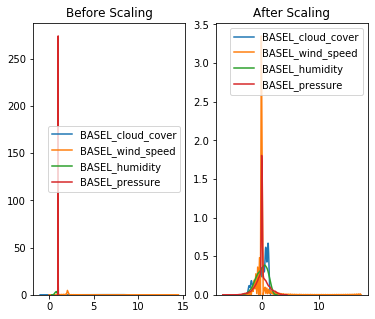

In [6]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_cloud_cover'], ax=ax1)
sns.kdeplot(X_train['BASEL_wind_speed'], ax=ax1)
sns.kdeplot(X_train['BASEL_humidity'], ax=ax1)
sns.kdeplot(X_train['BASEL_pressure'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_cloud_cover'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_wind_speed'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_humidity'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_pressure'], ax=ax2)

plt.show()

MLP CLASSIFIERS (ANN)

MODEL 1
- Number of nodes     : 5, 5 (2 layers)
- Number of epochs    : 500
- Tolerance           : 0.0001

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [8]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.41453636997443644
0.4140815615196933


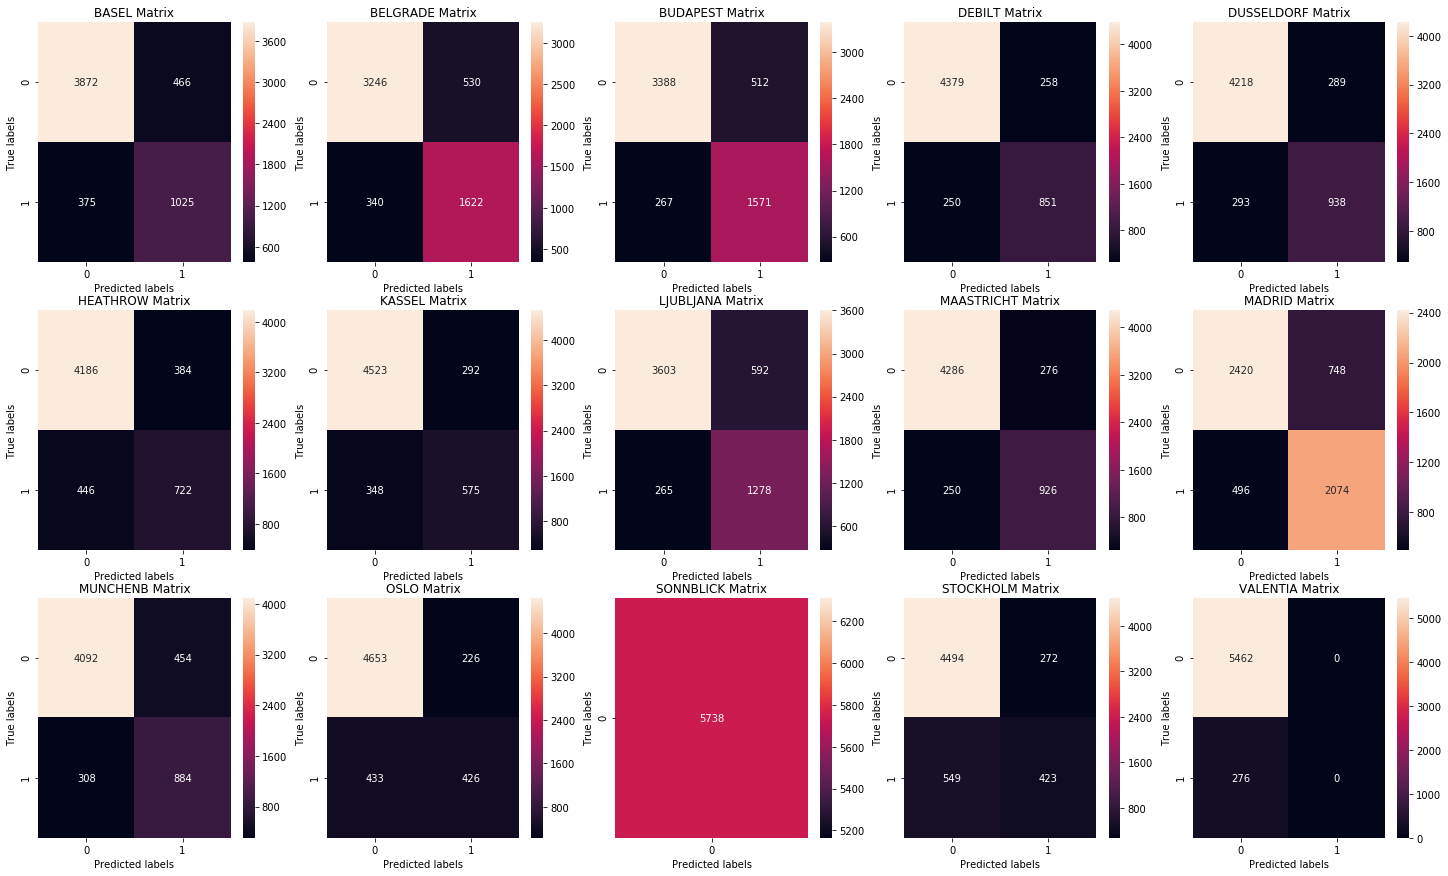

In [9]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

MODEL 2
- Number of nodes  : 100, 50, 25 (3 layers)
- Number of epochs : 2000
- Tolerance        : 0.000001

In [10]:
mlp1 = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=2000, tol=0.000001)
mlp1.fit(X_train, y_train)
y_pred = mlp1.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp1.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6716825470601906
0.5834785639595678


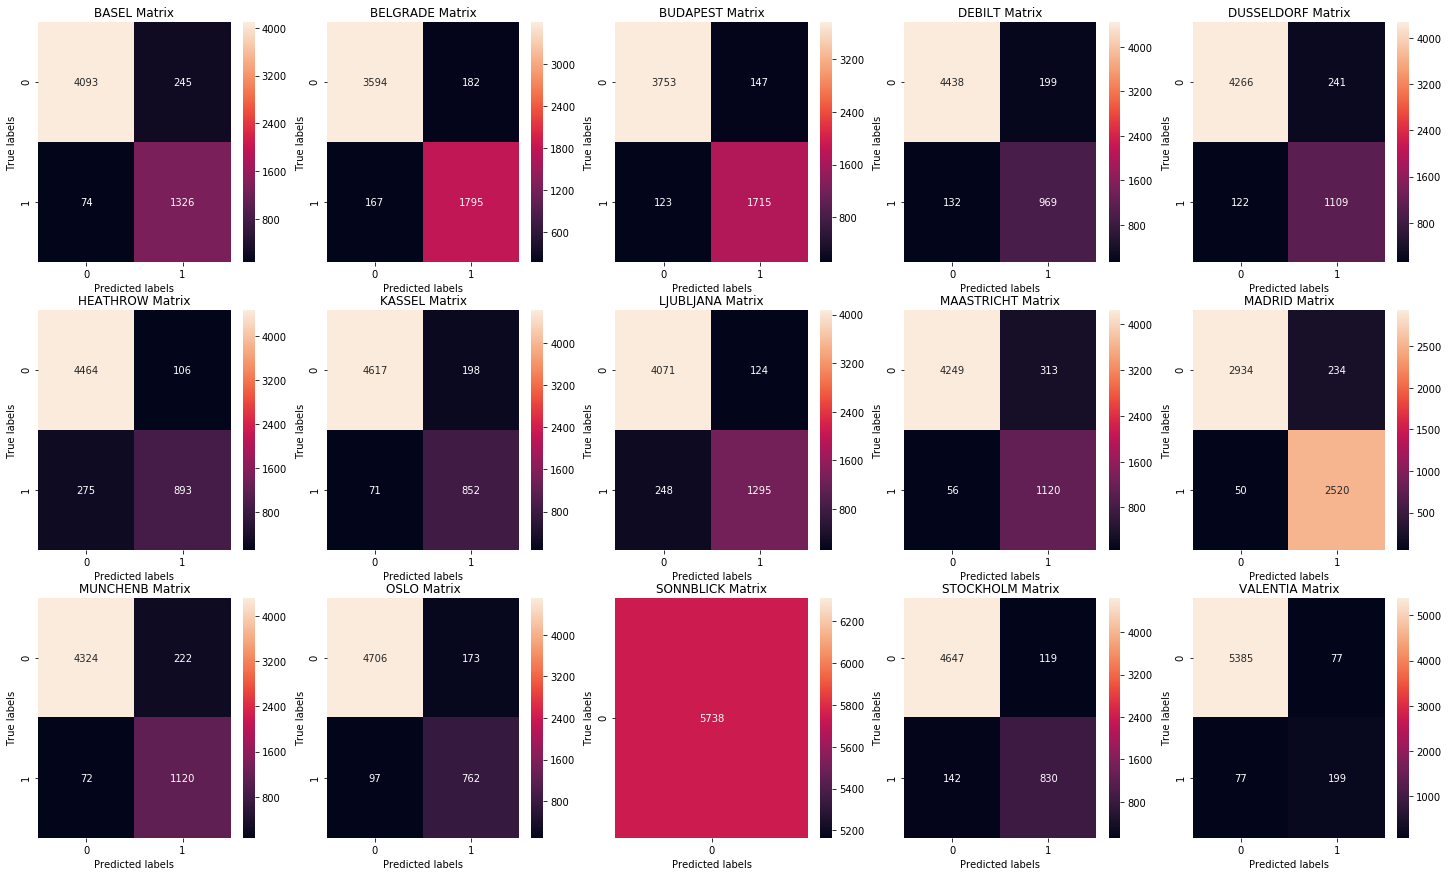

In [11]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [12]:
mlp2 = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=3000, tol=0.00000000001)
mlp2.fit(X_train, y_train)
y_pred = mlp2.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp2.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7511619800139437
0.5660508888114325


MODEL 3
- Number of nodes  : 200, 100, 50 (3 layers)
- Number of epochs : 3000
- Tolerance        : 0.00000000001

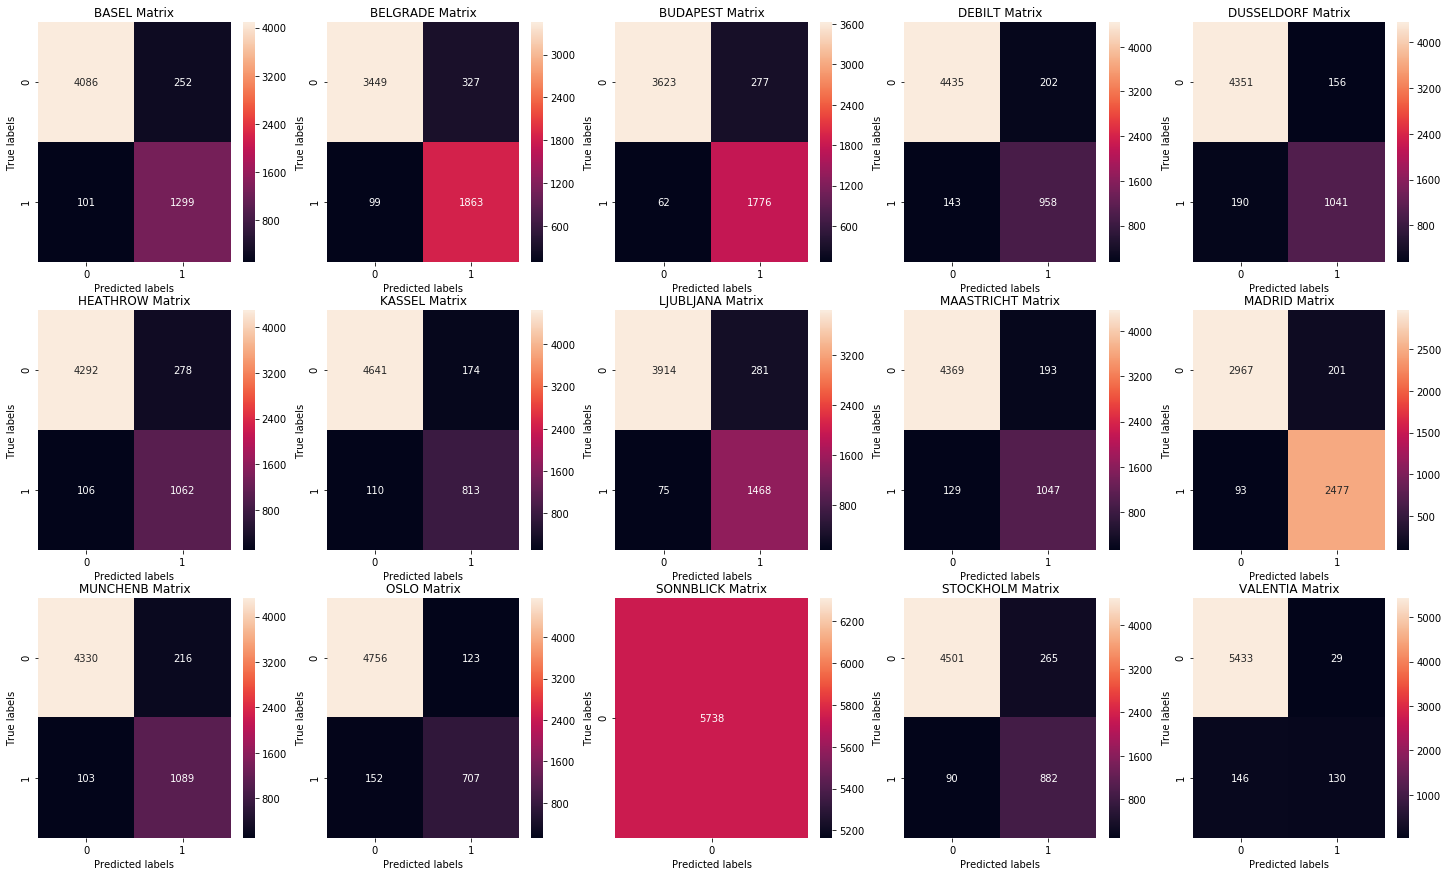

In [13]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1